# Problem statement
An online question and answer platform has hired you as a data scientiest to identify the best question authors on the platform.
The identification will bring  more insight into increasing user engagement.Given Tag of question ,Number of the Views recived,
Number of the Answer,username and reputation of question Author,the problem required to you to predict the upvote count that the
question will receive.

# Import Libraries

In [1]:
# importing the basic libraries for analysis

import numpy as np
import pandas as pd
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Reading Train Dataset

In [2]:
Train=pd.read_csv(r"C:\Users\lenovo\Documents\upvote_train.csv")
Train

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0
...,...,...,...,...,...,...,...
330040,339800,c,36.0,2.0,84919,1063.0,0.0
330041,253800,c,1649.0,2.0,76730,23319.0,73.0
330042,210756,c,6178.0,2.0,91701,2453.0,15.0
330043,56089,j,89.0,2.0,80245,2107.0,3.0


In [3]:
Train.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
Train.shape

(330045, 7)

# Cleaning Part

In [5]:
Train.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [6]:
Train.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [7]:
Train.drop(['ID','Username'],inplace=True,axis=1)
Train.head()

,Tag,Reputation,Answers,Views,Upvotes
0,a,3942.0,2.0,7855.0,42.0
1,a,26046.0,12.0,55801.0,1175.0
2,c,1358.0,4.0,8067.0,60.0
3,a,264.0,3.0,27064.0,9.0
4,c,4271.0,4.0,13986.0,83.0


# Missing Value Treatment
missing values are usually repressented in the form of Nan or null or none in the data set

In [8]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Tag         330045 non-null  object 
 1   Reputation  330045 non-null  float64
 2   Answers     330045 non-null  float64
 3   Views       330045 non-null  float64
 4   Upvotes     330045 non-null  float64
dtypes: float64(4), object(1)
memory usage: 12.6+ MB


In [9]:
Train.isnull().sum()

Tag           0
Reputation    0
Answers       0
Views         0
Upvotes       0
dtype: int64

# Data Type Conversion

In [10]:
Train.dtypes

Tag            object
Reputation    float64
Answers       float64
Views         float64
Upvotes       float64
dtype: object

# Label Encoder
label encoding refers to converting the labels into a numeric form so as to convert them into the machine readable form

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [12]:
Train.Tag.value_counts()

c    72458
j    72232
p    43407
i    32400
a    31695
s    23323
h    20564
o    14546
r    12442
x     6978
Name: Tag, dtype: int64

In [13]:
Train.Tag=le.fit_transform(Train.Tag)
Train.dtypes

Tag             int32
Reputation    float64
Answers       float64
Views         float64
Upvotes       float64
dtype: object

# Correlation Between the features

<AxesSubplot:>

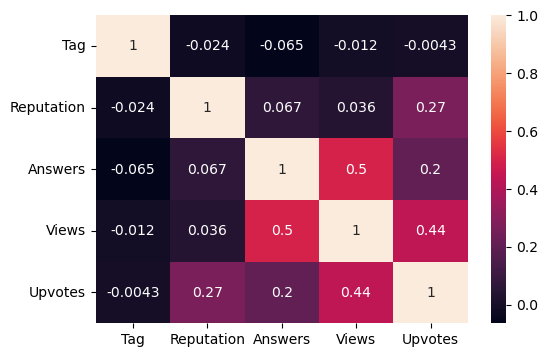

In [14]:
# we can also see the correlation with the upvotes
plt.figure(figsize=(6,4))
cmap=Train.corr()
sns.heatmap(cmap,annot=True)

# Exporatory Data Analysis(EDA)

In [15]:
Train.describe()

,Tag,Reputation,Answers,Views,Upvotes
count,330045.00000,3.300450e+05,330045.000000,3.300450e+05,330045.000000
mean,3.54305,7.773147e+03,3.917672,2.964507e+04,337.505358
std,2.49392,2.706141e+04,3.579515,8.095646e+04,3592.441135
min,0.00000,0.000000e+00,0.000000,9.000000e+00,0.000000
25%,1.00000,2.820000e+02,2.000000,2.594000e+03,8.000000
50%,4.00000,1.236000e+03,3.000000,8.954000e+03,28.000000
75%,6.00000,5.118000e+03,5.000000,2.687000e+04,107.000000
max,9.00000,1.042428e+06,76.000000,5.231058e+06,615278.000000


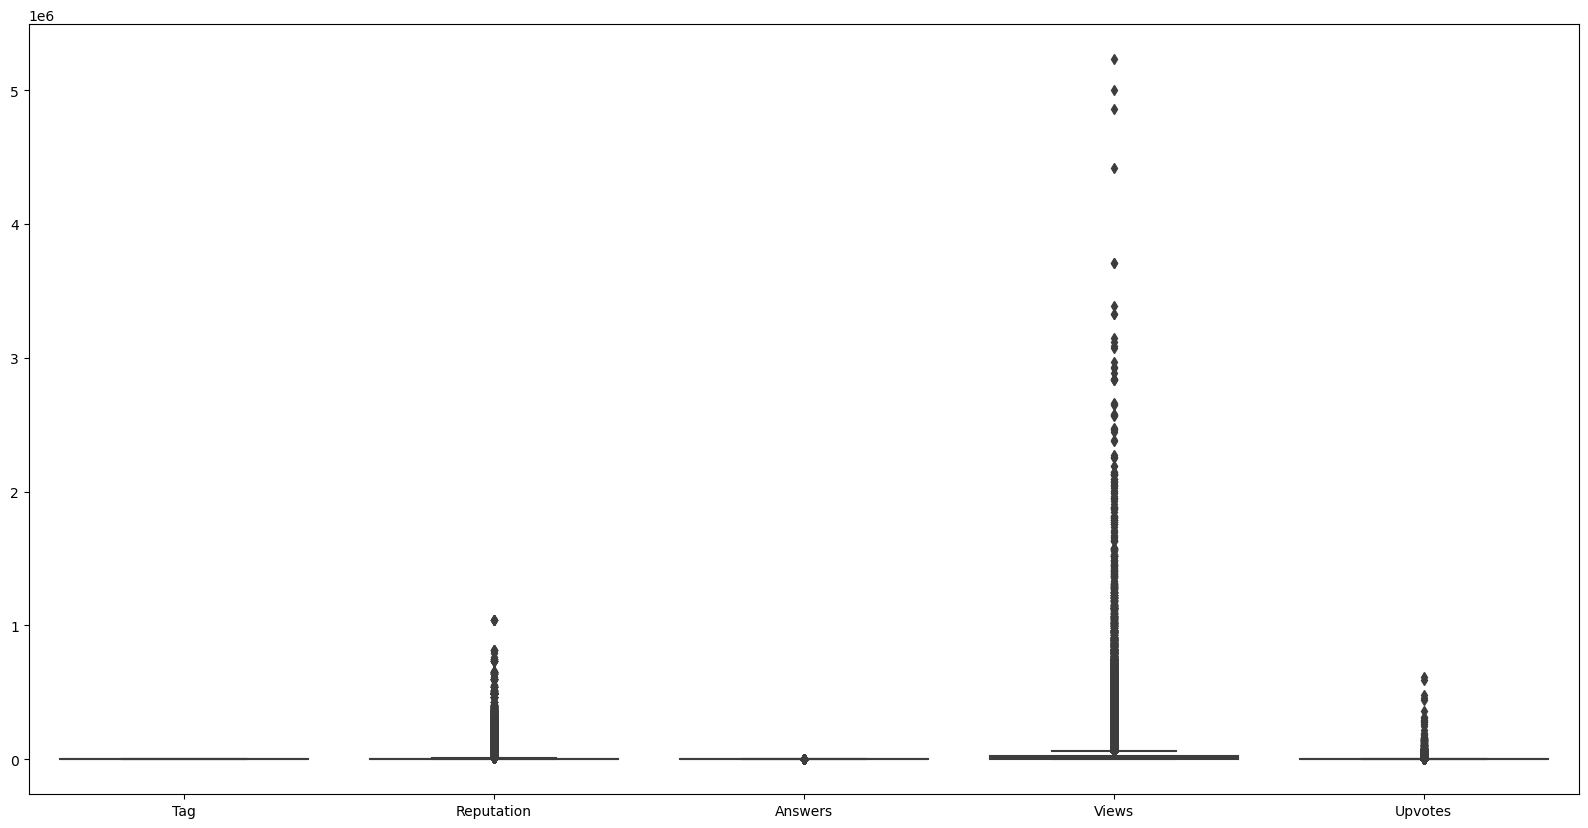

In [16]:
plt.figure(figsize=(20,10))
sns.boxplot(data=Train)
plt.show()

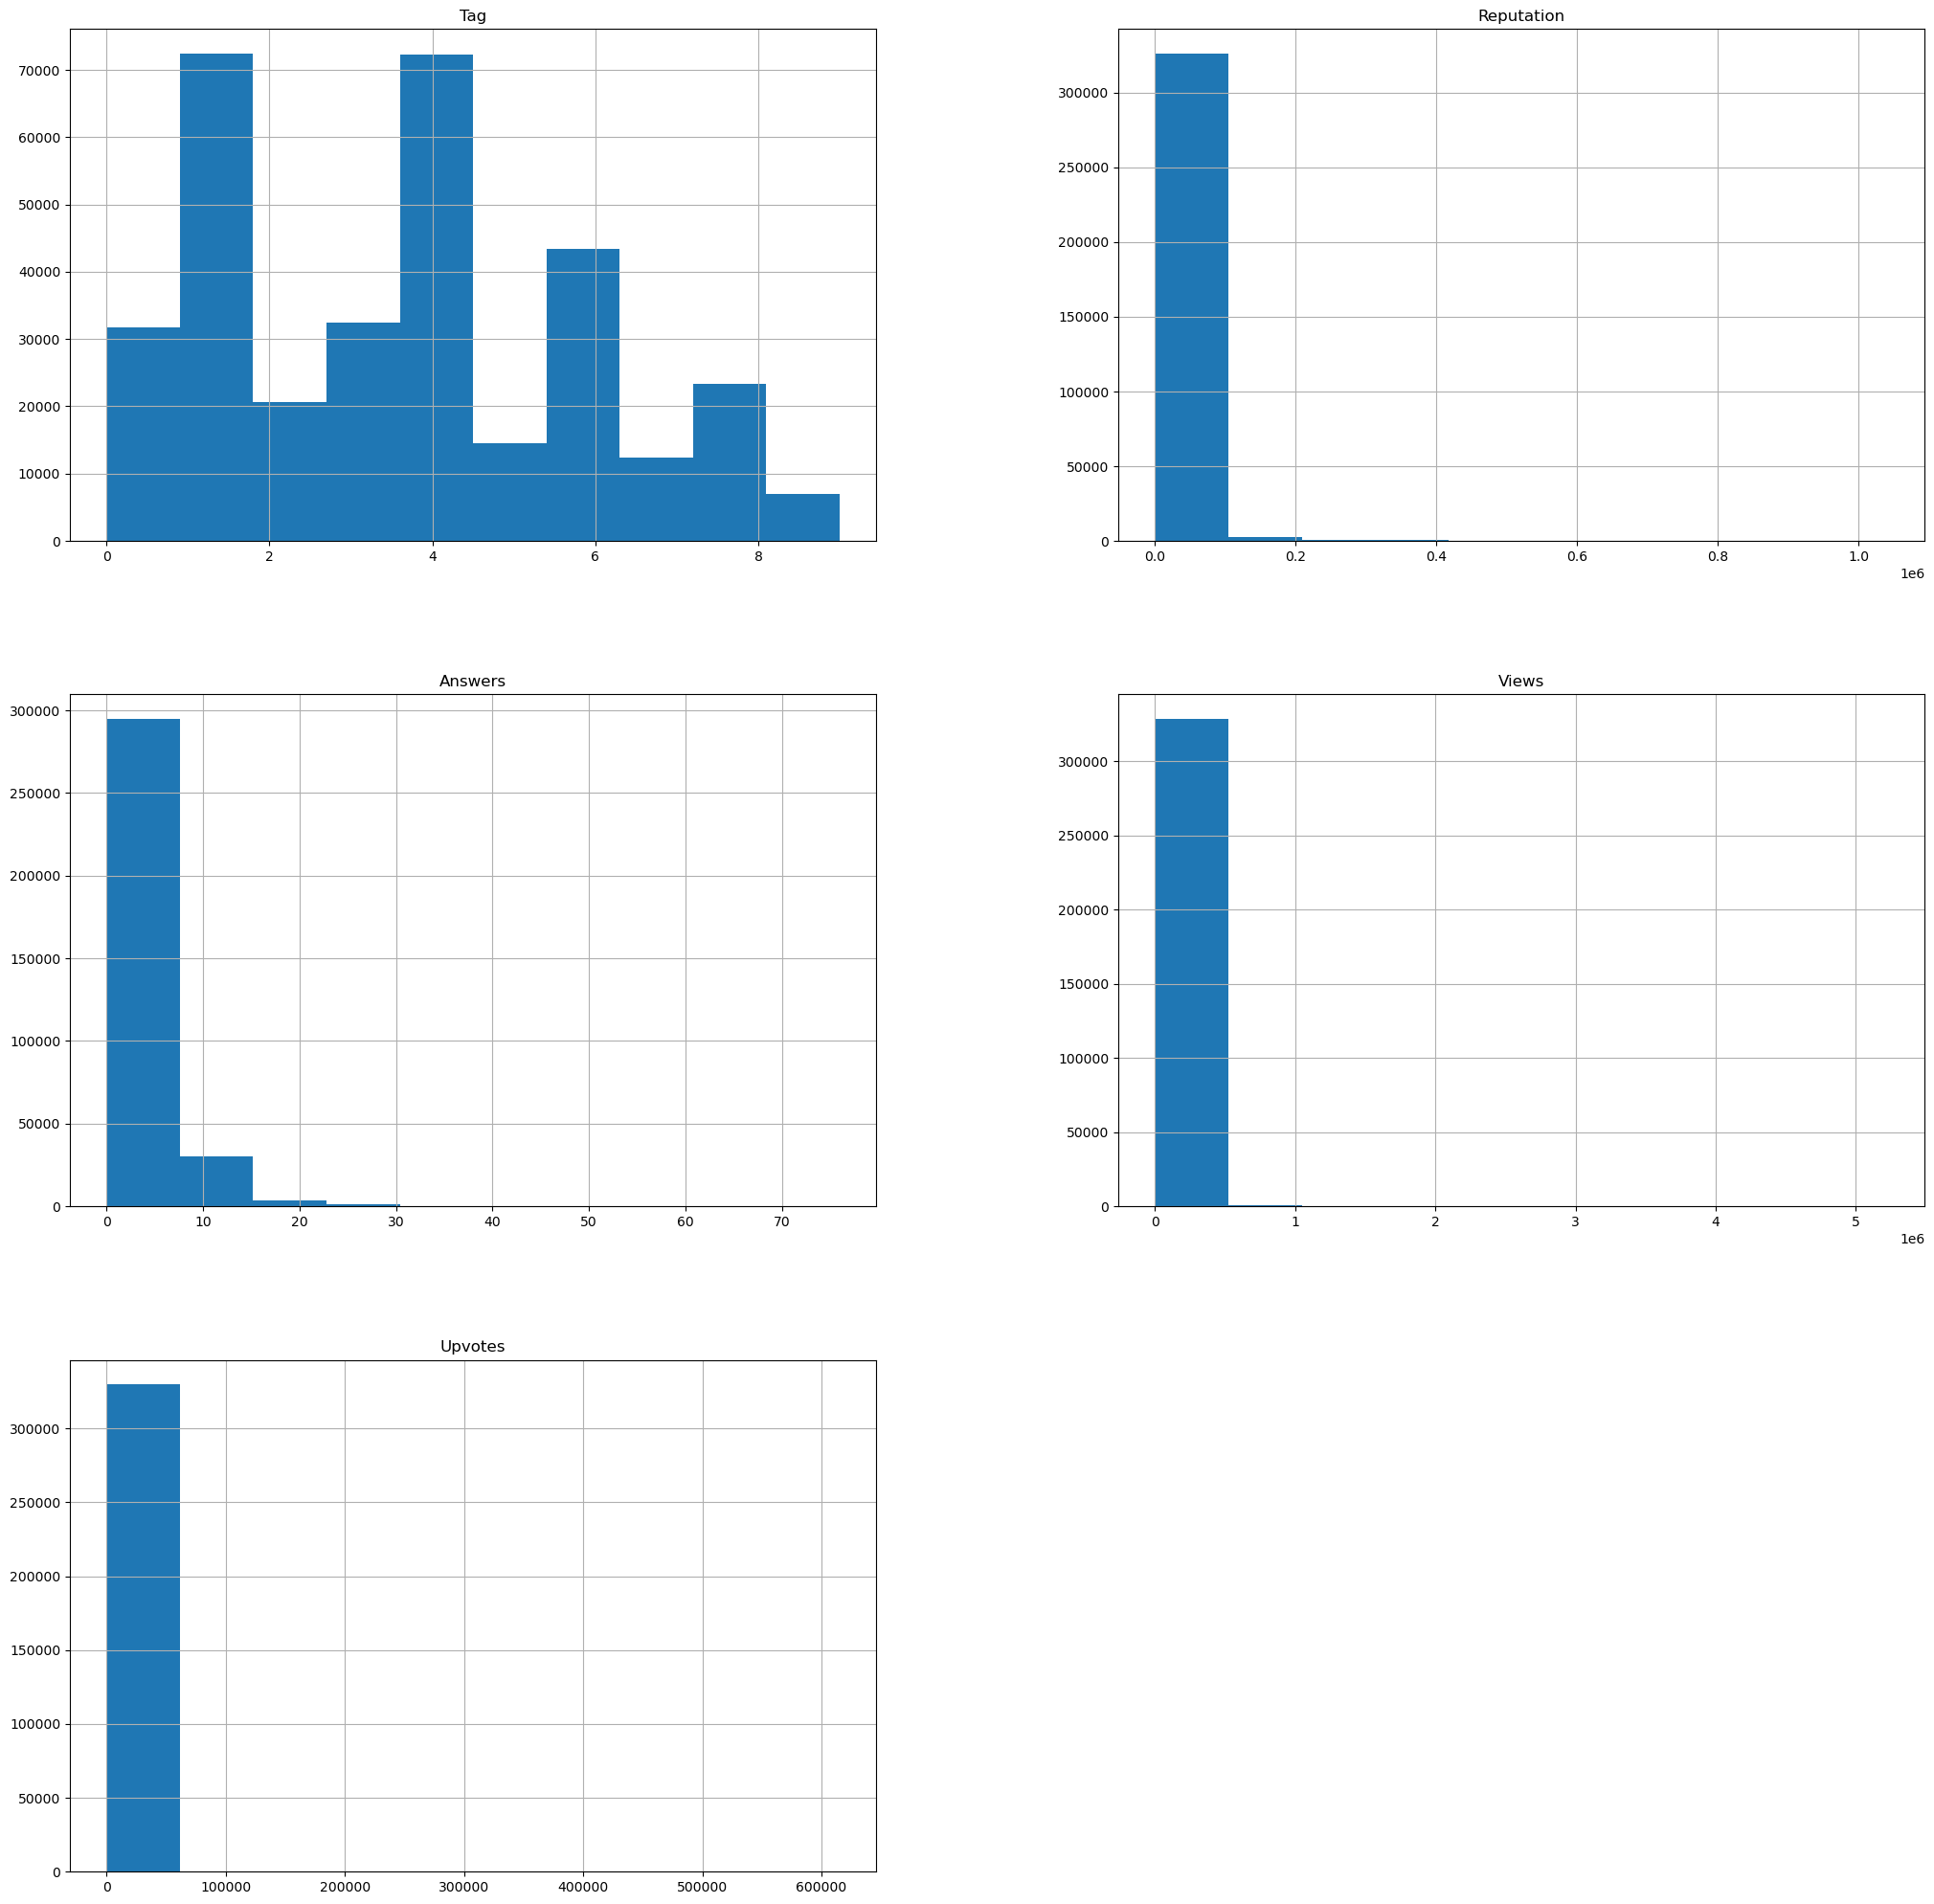

In [17]:
Train.hist(figsize=(25,25))
plt.show()

# outlier Tratment

In [18]:
Train.Reputation.value_counts()

0.0        6632
1.0        1077
11.0       1032
16.0       1030
6.0         980
           ... 
24959.0       1
12155.0       1
44275.0       1
18898.0       1
65763.0       1
Name: Reputation, Length: 16527, dtype: int64

<AxesSubplot:ylabel='Reputation'>

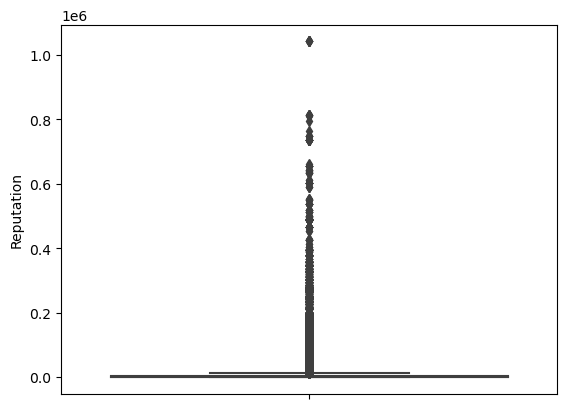

In [19]:
sns.boxplot(data=Train,y="Reputation")

<AxesSubplot:xlabel='Reputation', ylabel='Density'>

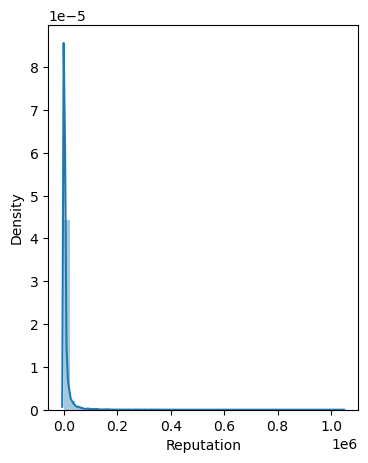

In [20]:
fig=plt.figure(figsize=(4,5))
sns.distplot(Train.Reputation)

In [21]:
iqr=Train.Reputation.quantile(0.75)-Train.Reputation.quantile(0.25)
iqr

4836.0

In [22]:
Train.Reputation.describe()

count    3.300450e+05
mean     7.773147e+03
std      2.706141e+04
min      0.000000e+00
25%      2.820000e+02
50%      1.236000e+03
75%      5.118000e+03
max      1.042428e+06
Name: Reputation, dtype: float64

In [23]:
lb=Train["Reputation"].quantile(0.25)-(iqr*3)
ub=Train["Reputation"].quantile(0.75)+(iqr*3)
print(lb,ub)


-14226.0 19626.0


In [24]:
Train.loc[Train["Reputation"]>19626.0,"Reputation"]=19626.0

In [25]:
Train.Views.value_counts()

87.0        101
77.0         99
74.0         94
79.0         94
86.0         92
           ... 
35214.0       1
88926.0       1
398314.0      1
62023.0       1
23319.0       1
Name: Views, Length: 82137, dtype: int64

<AxesSubplot:ylabel='Views'>

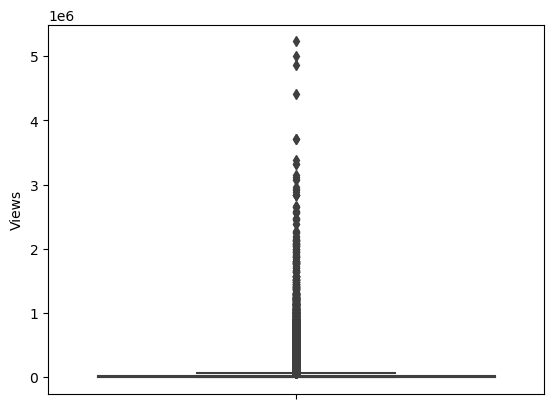

In [26]:
sns.boxplot(data=Train,y="Views")

<AxesSubplot:xlabel='Views', ylabel='Density'>

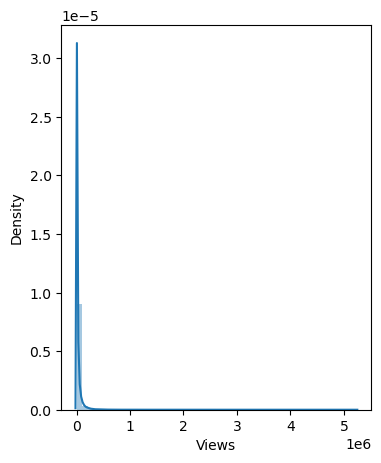

In [27]:
fig=plt.figure(figsize=(4,5))
sns.distplot(Train.Views)

In [28]:
iqr=Train.Views.quantile(0.75)-Train.Views.quantile(0.25)
iqr

24276.0

In [29]:
Train.Views.describe()

count    3.300450e+05
mean     2.964507e+04
std      8.095646e+04
min      9.000000e+00
25%      2.594000e+03
50%      8.954000e+03
75%      2.687000e+04
max      5.231058e+06
Name: Views, dtype: float64

In [30]:
lb=Train["Views"].quantile(0.25)-(iqr*3)
ub=Train["Views"].quantile(0.75)+(iqr*3)
print(lb,ub)

-70234.0 99698.0


In [31]:
Train.loc[Train["Views"]>99698.0,"Views"]=99698.0

In [32]:
Train.Answers.value_counts()

2.0     71549
1.0     65158
3.0     56331
4.0     40485
5.0     27871
        ...  
59.0        1
53.0        1
76.0        1
66.0        1
55.0        1
Name: Answers, Length: 63, dtype: int64

<AxesSubplot:ylabel='Answers'>

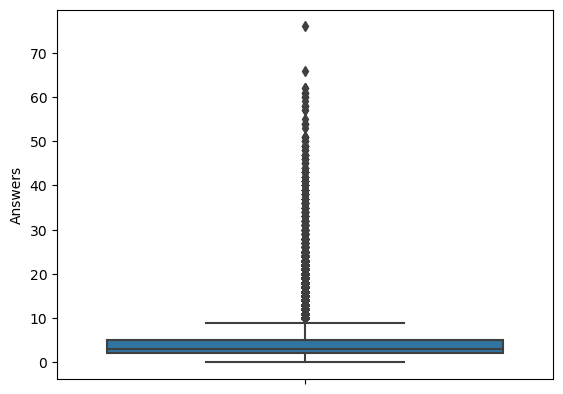

In [33]:
sns.boxplot(data=Train,y="Answers")

<AxesSubplot:xlabel='Answers', ylabel='Density'>

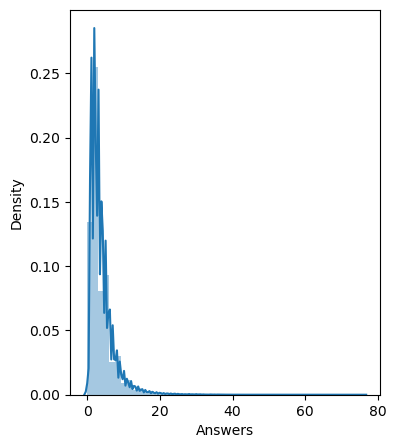

In [34]:
fig=plt.figure(figsize=(4,5))
sns.distplot(Train.Answers)

In [35]:
iqr=Train.Answers.quantile(0.75)-Train.Answers.quantile(0.25)
iqr

3.0

In [36]:
Train.Answers.describe()

count    330045.000000
mean          3.917672
std           3.579515
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          76.000000
Name: Answers, dtype: float64

In [37]:
lb=Train["Answers"].quantile(0.25)-(iqr*3)
ub=Train["Answers"].quantile(0.75)+(iqr*3)
print(lb,ub)

-7.0 14.0


In [38]:
Train.loc[Train["Answers"]>14.0,"Answers"]=14.0

<AxesSubplot:xlabel='Answers', ylabel='Density'>

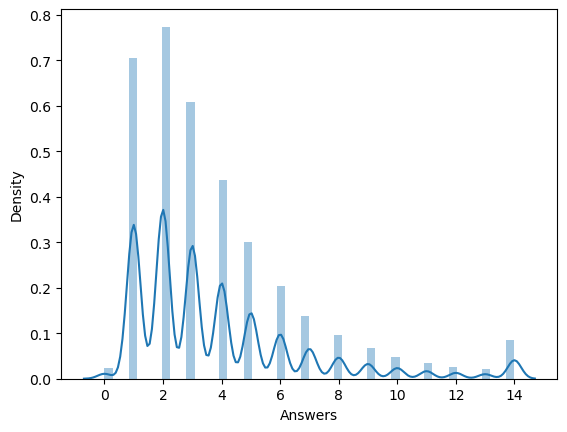

In [39]:
sns.distplot(Train.Answers)

In [40]:
Train.Upvotes.value_counts()

3.0        11474
2.0        11247
1.0        10872
4.0        10778
5.0         9578
           ...  
17174.0        1
3074.0         1
28801.0        1
5184.0         1
45611.0        1
Name: Upvotes, Length: 7239, dtype: int64

<AxesSubplot:ylabel='Upvotes'>

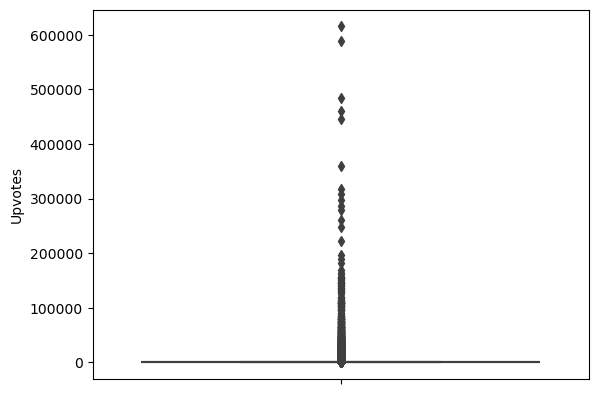

In [41]:
sns.boxplot(data=Train,y="Upvotes")

<AxesSubplot:xlabel='Upvotes', ylabel='Density'>

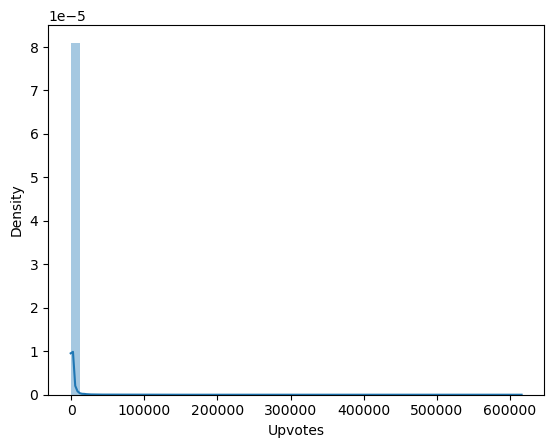

In [42]:
sns.distplot(Train.Upvotes)

In [43]:
iqr=Train.Upvotes.quantile(0.75)-Train.Upvotes.quantile(0.25)
iqr

99.0

In [44]:
Train.Upvotes.describe()

count    330045.000000
mean        337.505358
std        3592.441135
min           0.000000
25%           8.000000
50%          28.000000
75%         107.000000
max      615278.000000
Name: Upvotes, dtype: float64

In [45]:
lb=Train["Upvotes"].quantile(0.25)-(iqr*3)
ub=Train["Upvotes"].quantile(0.75)+(iqr*3)
print(lb,ub)

-289.0 404.0


In [46]:
Train.loc[Train["Upvotes"]>404.0,"Upvotes"]=404.0

<AxesSubplot:xlabel='Upvotes', ylabel='Density'>

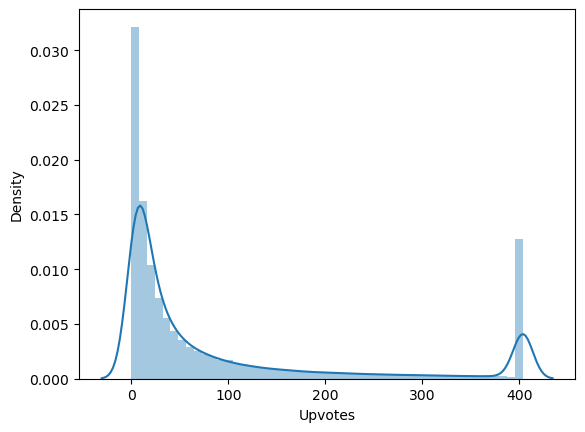

In [47]:
sns.distplot(Train.Upvotes)

# Reading Test data

In [48]:
Test=pd.read_csv(r"C:\Users\lenovo\Documents\upvote_test.csv")
Test

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0
...,...,...,...,...,...,...
141443,47187,j,4681.0,4.0,152060,2469.0
141444,329126,j,7782.0,3.0,89235,18998.0
141445,282334,p,435.0,5.0,119788,57048.0
141446,386629,o,176.0,3.0,86824,10193.0


In [49]:
Test.shape

(141448, 6)

In [50]:
Test.drop(['ID','Username'],inplace=True, axis=1)
Test.head()

,Tag,Reputation,Answers,Views
0,a,5645.0,3.0,33200.0
1,c,24511.0,6.0,2730.0
2,i,927.0,1.0,21167.0
3,i,21.0,6.0,18528.0
4,i,4475.0,10.0,57240.0


In [51]:
Test.isnull().sum()

Tag           0
Reputation    0
Answers       0
Views         0
dtype: int64

In [52]:
Test.dtypes

Tag            object
Reputation    float64
Answers       float64
Views         float64
dtype: object

In [53]:
Test.Tag=le.fit_transform(Test.Tag)
Test.dtypes

Tag             int32
Reputation    float64
Answers       float64
Views         float64
dtype: object

<AxesSubplot:>

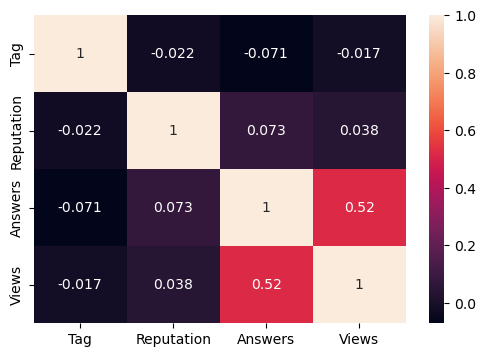

In [54]:
plt.figure(figsize=(6,4))
cmap=Test.corr()
sns.heatmap(cmap,annot=True)

In [55]:
Train.shape

(330045, 5)

In [56]:
Test.shape

(141448, 4)

In [57]:
x=Train.iloc[:,0:-1]
y=Train.iloc[:,-1]

# split Train and Test Data

In [58]:
import sklearn 
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [60]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((264036, 4), (66009, 4), (264036,), (66009,))

# 1. Simple linear Regression

In [61]:
from sklearn import linear_model
lin=linear_model.LinearRegression()

In [62]:
lin.fit(x_train,y_train)

LinearRegression()

In [63]:
lin_p=lin.predict(x_test)
lin_p

array([-10.22634504, 146.77596268,   8.74615003, ...,  37.32609469,
        -2.0638722 ,  84.82394197])

In [64]:
lin.coef_

array([-4.85737656e-01,  1.21289502e-02,  2.54002201e+00,  2.38428957e-03])

In [65]:
lin.intercept_

-18.43076533198844

In [66]:
R2=lin.score(x_train,y_train)
R2

0.6983124966037153

In [67]:
Adj_R2=1-(((1-R2)*(264036-1))/(264036-4-1))
Adj_R2

0.6983079261176224

In [68]:
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,lin_p)
mse

4972.061143820703

In [69]:
df1=pd.DataFrame({"Actual":y_test,"Predicted":lin_p})
df1

,Actual,Predicted
178084,0.0,-10.226345
101198,158.0,146.775963
84860,19.0,8.746150
143015,388.0,-11.083948
139526,10.0,61.724382
...,...,...
243167,57.0,-3.111103
77443,61.0,63.984525
122524,57.0,37.326095
276497,4.0,-2.063872


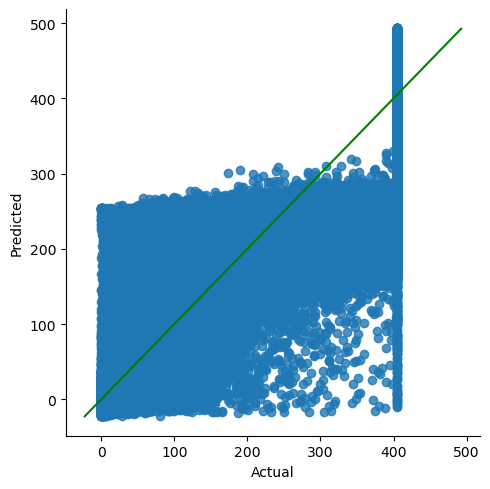

In [70]:
sns.lmplot(x="Actual",y="Predicted",data=df1,fit_reg=False)
d_line=np.arange(df1.min().min(),df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# 2. Elastic Net

In [71]:
from sklearn.linear_model import ElasticNet
e=ElasticNet()

In [72]:
e.fit(x_train,y_train)

ElasticNet()

In [73]:
e_p=e.predict(x_test)
e_p

array([ -9.70537372, 147.66557415,   8.82410296, ...,  37.38681066,
        -2.54984752,  84.03844731])

In [74]:
e_rsq=e.score(x_train,y_train)
e_rsq

0.6982812976605473

In [75]:
e_adr=1-(((1-e_rsq)*(264036-1))/(264036-4-1))
e_adr

0.6982767267017986

In [76]:
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,e_p)
mse

4971.940246035965

In [77]:
df2=pd.DataFrame({"Actual":y_test,"Predicted":e_p})
df2


,Actual,Predicted
178084,0.0,-9.705374
101198,158.0,147.665574
84860,19.0,8.824103
143015,388.0,-10.932675
139526,10.0,62.335413
...,...,...
243167,57.0,-2.655939
77443,61.0,65.050680
122524,57.0,37.386811
276497,4.0,-2.549848


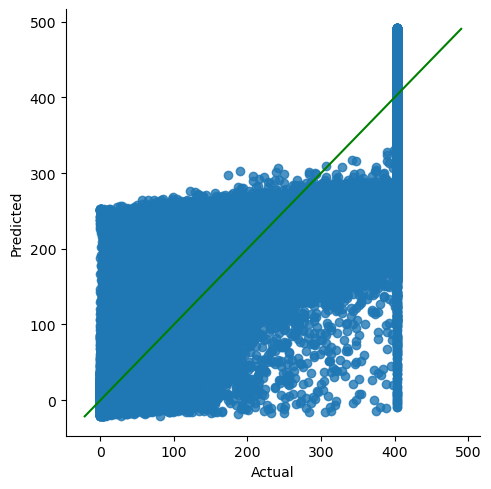

In [78]:
sns.lmplot(x="Actual",y="Predicted",data=df2,fit_reg=False)
d_line=np.arange(df2.min().min(),df2.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# 3.Random Forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [96]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [97]:
rfr_p=rfr.predict(x_test)

In [84]:
rf_rsq=rfr.score(x_train,y_train)
rf_rsq

0.9779882045886912

In [85]:
rf_adr=1-(((1-rf_rsq)*(264036-1))/(264036-4-1))
rf_adr

0.9779878711157973

In [86]:
rfr_MSE=metrics.mean_squared_error(y_test,rfr_p)
rfr_MSE

2370.136113047934

In [87]:
df3=pd.DataFrame({"Actual":y_test,"Predicted":rfr_p})
df3

,Actual,Predicted
178084,0.0,2.96
101198,158.0,158.70
84860,19.0,12.70
143015,388.0,2.94
139526,10.0,10.68
...,...,...
243167,57.0,13.39
77443,61.0,70.88
122524,57.0,42.35
276497,4.0,16.23


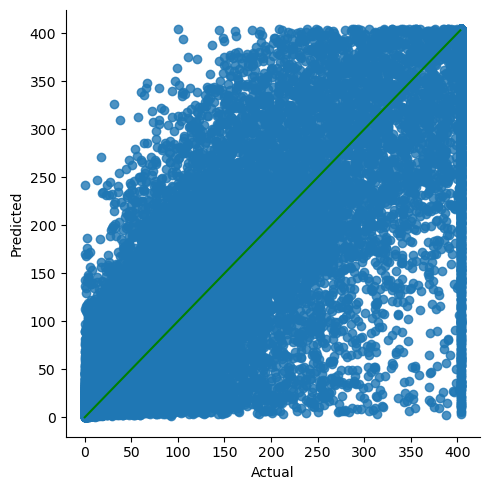

In [88]:
sns.lmplot(x="Actual",y="Predicted",data=df3,fit_reg=False)
d_line=np.arange(df3.min().min(),df3.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# 4. Descision Tree Regression

In [89]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [90]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [91]:
dtr_p=dtr.predict(x_test)

In [92]:
dtr_rsq=dtr.score(x_train,y_train)
dtr_rsq

0.9979023001886584

In [93]:
dtr_adr=1-(((1-dtr_rsq)*(264036-1))/(264036-4-1))
dtr_adr

0.9979022684090597

In [94]:
dtr_MSE=metrics.mean_squared_error(y_test,dtr_p)
dtr_MSE

4369.263781566783

In [95]:
df5=pd.DataFrame({"Actual":y_test,"Predicted":dtr_p})
df5

,Actual,Predicted
178084,0.0,0.0
101198,158.0,213.0
84860,19.0,6.0
143015,388.0,1.0
139526,10.0,3.0
...,...,...
243167,57.0,12.0
77443,61.0,143.0
122524,57.0,44.0
276497,4.0,20.0


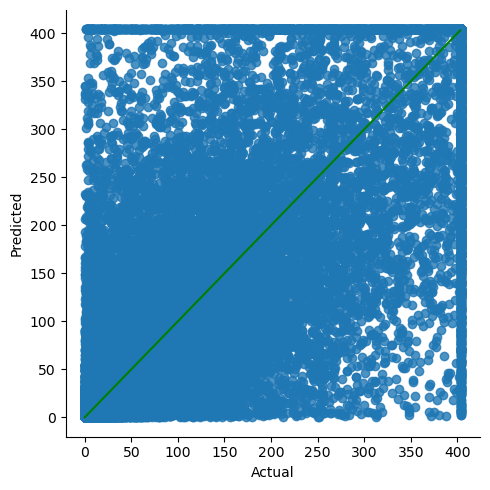

In [95]:
sns.lmplot(x="Actual",y="Predicted",data=df5,fit_reg=False)
d_line=np.arange(df5.min().min(),df5.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# 5. Extra Tree Regression

In [122]:
from sklearn.ensemble import ExtraTreesRegressor
ex=ExtraTreesRegressor()

In [123]:
ex.fit(x_train,y_train)

ExtraTreesRegressor()

In [124]:
ex_p=ex.predict(x_test)

In [125]:
ex_rsq=ex.score(x_train,y_train)
ex_rsq

0.9979023001886584

In [126]:
ex_adr=1-(((1-ex_rsq)*(264036-1))/(264036-4-1))
ex_adr

0.9979022684090597

In [127]:
ex_MSE=metrics.mean_squared_error(y_test,ex_p)
ex_MSE

2641.9720436041084

In [128]:
df4=pd.DataFrame({"Actual":y_test,"Predicted":ex_p})
df4

,Actual,Predicted
178084,0.0,2.17
101198,158.0,184.34
84860,19.0,6.52
143015,388.0,9.04
139526,10.0,11.91
...,...,...
243167,57.0,14.26
77443,61.0,74.15
122524,57.0,61.14
276497,4.0,14.47


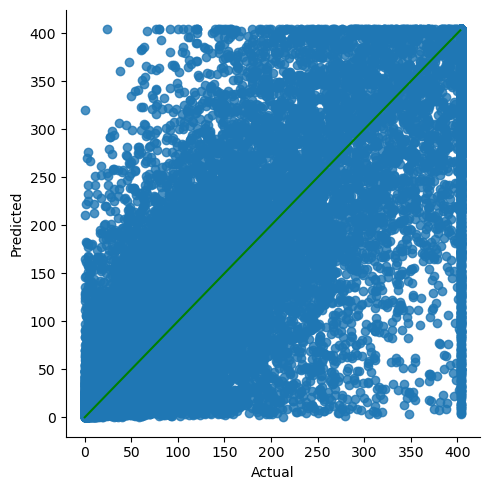

In [129]:
sns.lmplot(x="Actual",y="Predicted",data=df4,fit_reg=False)
d_line=np.arange(df4.min().min(),df4.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# 6.Ada-Boost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()

In [ ]:
ad.fit(x_train,y_train)

In [ ]:
ad_p=ad.predict(x_test)

In [ ]:
ad_rsq=ad.score(x_train,y_train)
ad_rsq

In [ ]:
ad_adr=1-(((1-ad_rsq)*(264036-1))/(264036-4-1))
ad_adr

In [ ]:
ad_MSE=metrics.mean_squared_error(y_test,ad_p)
ad_MSE

In [ ]:
df6=pd.DataFrame({"Actual":y_test,"Predicted":ad_p})
df6

In [ ]:
sns.lmplot(x="Actual",y="Predicted",data=df6,fit_reg=False)
d_line=np.arange(df6.min().min(),df6.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# 7.SVM Regressor

In [112]:
from sklearn.svm import LinearSVR
sv=LinearSVR()

In [113]:
sv.fit(x_train,y_train)

LinearSVR()

In [114]:
sv_p=sv.predict(x_test)

In [115]:
sv_rsq=sv.score(x_train,y_train)
sv_rsq

-0.8409142867031159

In [116]:
sv_adr=1-(((1-sv_rsq)*(264036-1))/(264036-4-1))
sv_adr

-0.8409421760689357

In [117]:
sv_MSE=sv_rsq=metrics.mean_squared_error(y_test,sv_p)
sv_MSE

30745.73187993303

In [118]:
df7=pd.DataFrame({"Actual":y_test,"Predicted":sv_p})
df7

,Actual,Predicted
178084,0.0,10.691643
101198,158.0,395.793302
84860,19.0,65.831990
143015,388.0,14.970903
139526,10.0,25.598666
...,...,...
243167,57.0,23.239964
77443,61.0,107.104524
122524,57.0,89.646030
276497,4.0,27.396320


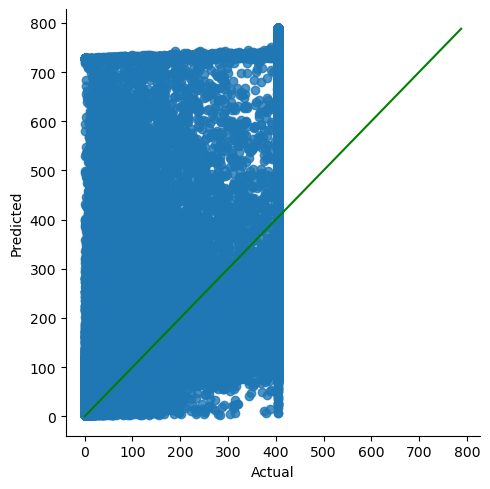

In [119]:
sns.lmplot(x="Actual",y="Predicted",data=df7,fit_reg=False)
d_line=np.arange(df7.min().min(),df7.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

# 8.KNN Regressor

In [102]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=10)

In [103]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [104]:
knn_p=knn.predict(x_test)

In [105]:
knn_rsq=knn.score(x_train,y_train)
knn_rsq

0.8839280019199541

In [106]:
knn_adr=1-(((1-knn_rsq)*(264036-1))/(264036-4-1))
knn_adr

0.8839262434598024

In [107]:
knn_MSE=metrics.mean_squared_error(y_test,knn_p)
knn_MSE

2292.8726413064883

In [110]:
df8=pd.DataFrame({"Actual":y_test,"Predicted":knn_p})
df8

,Actual,Predicted
178084,0.0,7.5
101198,158.0,153.5
84860,19.0,22.4
143015,388.0,11.1
139526,10.0,10.7
...,...,...
243167,57.0,13.2
77443,61.0,70.9
122524,57.0,43.2
276497,4.0,16.7


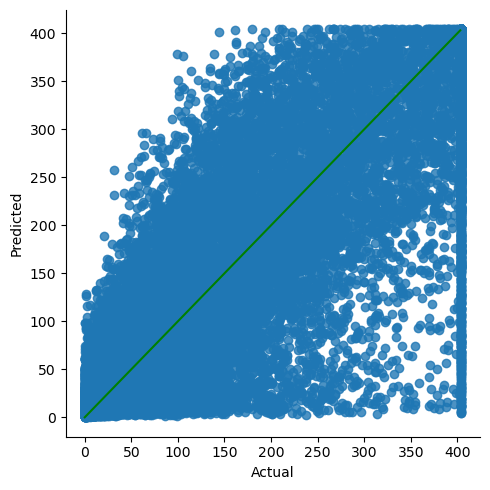

In [132]:
sns.lmplot(x="Actual",y="Predicted",data=df8,fit_reg=False)
d_line=np.arange(df8.min().min(),df8.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

In [133]:
from sklearn.linear_model import Lasso
lasso=Lasso()


In [134]:
lasso.fit(x_train,y_train)

Lasso()

In [135]:
l_p=lasso.predict(x_test)
l_p


array([ -9.79051187, 147.73464718,   8.63635503, ...,  37.39916118,
        -2.70000102,  84.39962629])

In [136]:
l_R2=lasso.score(x_train,y_train)
l_R2

0.6982934941422461

In [137]:
l_Adj_R2=1-(((1-l_R2)*(7213-1))/(7213-32-1))
l_Adj_R2

0.696948841191348

In [138]:
l_mse=metrics.mean_squared_error(y_test,l_p)
l_mse

4971.714200180613

In [139]:
l_df=pd.DataFrame({"Importances":list(lasso.coef_),"column":list(x_test)})
l_df

,Importances,column
0,-0.333347,Tag
1,0.012139,Reputation
2,2.374576,Answers
3,0.002395,Views
